<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/S5M3O4_UseSklearnToFitAndInterpretRidgeRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generate the practice data set
import numpy as np

np.random.seed(15)
x = 5 * np.random.rand(50)
y = abs(0.5*np.sin(x) + 0.5 * np.random.rand(50))*10

# Create the feature matrix
X = x[:, np.newaxis]

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Create the data for the model (best-fit line)
xfit = np.linspace(0, 5, 1000)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [2]:
# Fit a linear regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(15),
                           LinearRegression())

# Create the data for the model (best-fit line)
poly_model.fit(x[:, np.newaxis], y)
yfit_poly = poly_model.predict(xfit[:, np.newaxis])

In [3]:
# Fit a ridge regression with polynomial features
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_model = make_pipeline(PolynomialFeatures(15),
                            StandardScaler(),
                            Ridge(alpha = 0.05))

ridge_model.fit(x[:, np.newaxis], y)

# Create the data for the model (best-fit line)
yfit_ridge = ridge_model.predict(xfit[:, np.newaxis])

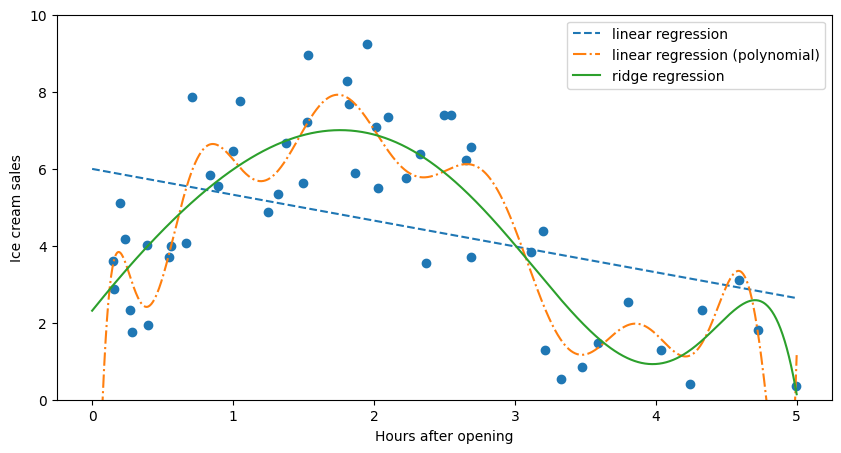

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)

ax.plot(xfit, yfit, linestyle='--', label='linear regression')
ax.plot(xfit, yfit_poly, linestyle = '-.', label='linear regression (polynomial)')
ax.plot(xfit, yfit_ridge, label='ridge regression')

ax.set_ylim([0, 10])

ax.set_xlabel('Hours after opening')
ax.set_ylabel('Ice cream sales')
ax.legend()

plt.show()